<font size = 5, font color='blue'>1.Top-10 reviewer

In [260]:
import numpy as np 
import scipy as sp 
import pandas as pd 


import matplotlib.pyplot as plt
import seaborn as sns


import nltk

import os

In [261]:
data_path = "Reviews.csv"

pd_data = pd.read_csv(data_path)

In [262]:
df=pd_data[:10000]

In [263]:
df=df.loc[:,['UserId','ProfileName','Score']]
df.insert(3,column='Score count',value=0)
df['Score count']=df.groupby(df['UserId']).transform('count')
result1=df.groupby(['UserId','ProfileName','Score count'],as_index=False)['Score'].agg({'Score mean':'sum'})

In [264]:
result1['Score mean']=result1['Score mean'] / result1['Score count']
result1=result1.sort_values(by='Score count',ascending=0)[:10]
result1

,UserId,ProfileName,Score count,Score mean
2330,A1Z54EM24Y40LL,c2,17,3.882353
4286,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
5169,A35R32TA60XD57,M. Torma,9,4.111111
2919,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
6442,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
6330,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6493,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
8390,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
2826,A26NFIQ7KWI8Y7,kt rose,6,2.666667
31,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


<font size = 5, font color='blue'>2.Plot score distribution for the user with the most number of reviews

In [265]:
df=df.sort_values(by='Score count',ascending=0)
count=result1['Score count'][2330]
df_1=df[:count]
df_1.index=range(len(df_1))

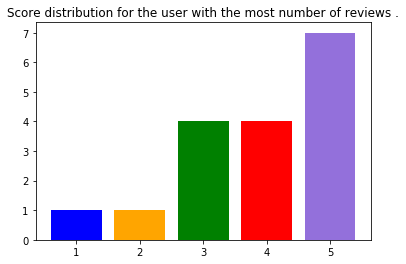

In [266]:
scorebest=df_1['Score']
x=np.array([1,2,3,4,5])
y=np.array([0,0,0,0,0])
for m in scorebest:
    for n in range(5):
        if(m==n+1):
            y[n]+=1
plt.bar(x[0],y[0],color='blue')
plt.bar(x[1],y[1],color='orange')
plt.bar(x[2],y[2],color='green')
plt.bar(x[3],y[3],color='red')
plt.bar(x[4],y[4],color='mediumPurple')
plt.title('Score distribution for the user with the most number of reviews .')
plt.show()

<font size = 5, font color='blue'>3. Plot pandas Series DataFrame (Time->Date)

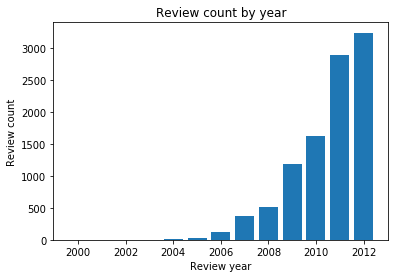

In [271]:
import time

year=[]
for m in pd_data['Time'][:10000]:
    year.append(time.localtime(m).tm_year)
year_max=max(year)
year_min=min(year)
x=range(year_min,year_max+1)
y=np.linspace(0,0,len(x))
for m in year:
    for n in range(13):
        if(m==n+2000):
            y[n]+=1
plt.bar(x,y)
plt.title('Review count by year')
plt.xlabel('Review year')
plt.ylabel('Review count')
plt.show()

<font size = 5, font color='blue'>4. Plot HeatMap using seaborn

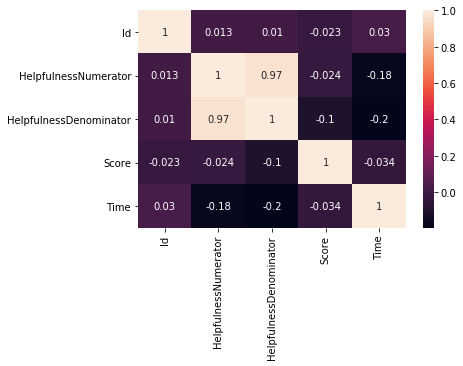

In [278]:
df=pd_data[:10000]
sns.heatmap(df.corr(),annot=True)

<font size = 5, font color='blue'>5. Helpful percent

In [280]:
df=pd_data[:10000]

In [285]:
count=df['HelpfulnessNumerator'].count()
ratio=[]
for m in range(count):
    if(df['HelpfulnessNumerator'][m]>df['HelpfulnessDenominator'][m]):
        continue
    elif (df['HelpfulnessNumerator'][m]==df['HelpfulnessDenominator'][m]==0):
        ratio.append(-1)
    else:
        ratio.append(df['HelpfulnessNumerator'][m]/df['HelpfulnessDenominator'][m])

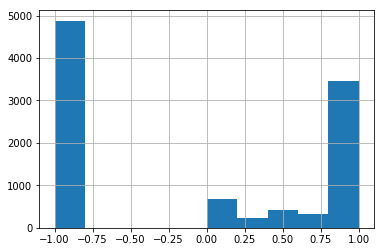

In [287]:
plt.hist(ratio,bins=10)
plt.grid()